📂 Please upload your dataset file (CSV format)...


Saving test.csv to test.csv

✅ File 'test.csv' uploaded successfully!



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB

📌 Missing values before cleaning:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

📌 Missing values after clean

/tmp/ipython-input-389312397.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cabin"].fillna("Unknown", inplace=True)
/tmp/ipython-input-389312397.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

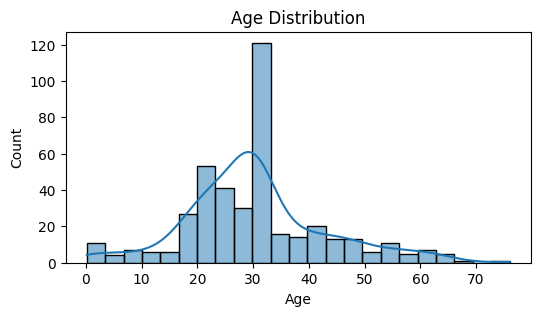

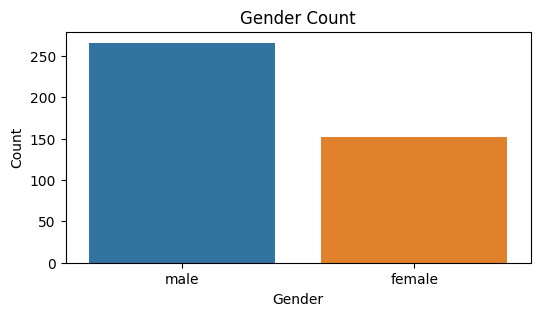

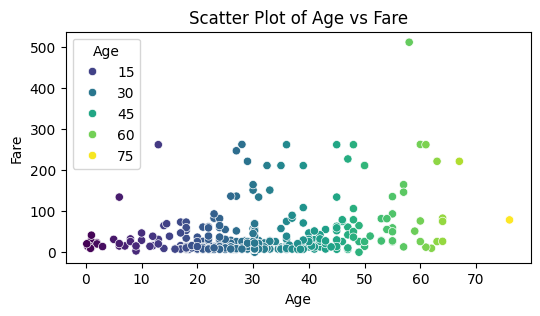

In [1]:
# 📌 Google Colab Ready Titanic Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload file
print("📂 Please upload your dataset file (CSV format)...")
uploaded = files.upload()

# Step 2: Load into DataFrame
for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f"\n✅ File '{filename}' uploaded successfully!\n")

# Step 3: Explore dataset
display(data.head())
display(data.tail())
display(data.describe())
data.info()

# Step 4: Handle missing values
print("\n📌 Missing values before cleaning:")
print(data.isnull().sum())

# Drop rows where "Embarked" is missing
if "Embarked" in data.columns:
    data.dropna(subset=["Embarked"], inplace=True)

# Fill missing Cabin values with "Unknown"
if "Cabin" in data.columns:
    data["Cabin"].fillna("Unknown", inplace=True)

# Fill missing Age values with mean
if "Age" in data.columns:
    data["Age"].fillna(data["Age"].mean(), inplace=True)

print("\n📌 Missing values after cleaning:")
print(data.isnull().sum())

# Step 5: Check duplicates
print("\n📌 Duplicate rows:", data.duplicated().sum())

# Step 6: Visualizations
plt.figure(figsize=(6, 3))
sns.histplot(data["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(data=data, x="Sex", hue="Sex")
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(data=data, x="Age", y="Fare", hue="Age", palette="viridis")
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# Survival by Gender (if 'Survived' column exists)
if "Survived" in data.columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x="Sex", hue="Survived")
    plt.title("Survival by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.legend(title="Survived", loc="upper right")
    plt.show()
